# Ejercicios de Train-Test con ScikitLearn a partir de un dataset con información sobre las viviendas de Houston.

# Ejercicio 1:

Parte el conjunto de datos adjunto en train y test. Estudia ambos conjuntos por separado, a nivel descriptivo.

También adjunto encontrarás una descripción de las diferentes variables del dataset.


In [1]:
# Importamos las librerías que vamos a necesitar:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
# Importamos los datos con los que vamos a trabajar:
df_housing = pd.read_csv("housing data.csv", header=None)
df_housing.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
# Asignamos los nombres a las columnas:
df_housing.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Descripción de los atributos.

Estudio del dataset.

In [4]:
# dimensiones del dataset
df_housing.shape

(506, 14)

In [5]:
# tipos de las variables:
df_housing.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [6]:
# búsqueda de valores vacíos:
df_housing.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
# búsqueda de valores nulos:
df_housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
df_housing.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.61,8.60,0.01,0.08,0.26,3.68,88.98
ZN,506.0,11.36,23.32,0.00,0.00,0.00,12.50,100.00
INDUS,506.0,11.14,6.86,0.46,5.19,9.69,18.10,27.74
CHAS,506.0,0.07,0.25,0.00,0.00,0.00,0.00,1.00
NOX,506.0,0.55,0.12,0.38,0.45,0.54,0.62,0.87
RM,506.0,6.28,0.70,3.56,5.89,6.21,6.62,8.78
AGE,506.0,68.57,28.15,2.90,45.02,77.50,94.07,100.00
DIS,506.0,3.80,2.11,1.13,2.10,3.21,5.19,12.13
RAD,506.0,9.55,8.71,1.00,4.00,5.00,24.00,24.00
TAX,506.0,408.24,168.54,187.00,279.00,330.00,666.00,711.00


# Análisis previo de las variables del dataset.

Si bien vamos a centrarnos en analizar el subdataset sobre el que vamos a construir nuestro modelo (conjunto de datos Train), ver profundidad cada variable, sus relaciones entre ellas y las relaciones con la variable objetivo, haremos un análisis previo de las variables del dataset completo. Con este paso previo queremos ver si alguna variable no tiene relación ninguna con nuestra variable resultado, o si tienen relaciones de correlación que no aporten nada al estudio.

Relación entre variables del dataset completo:

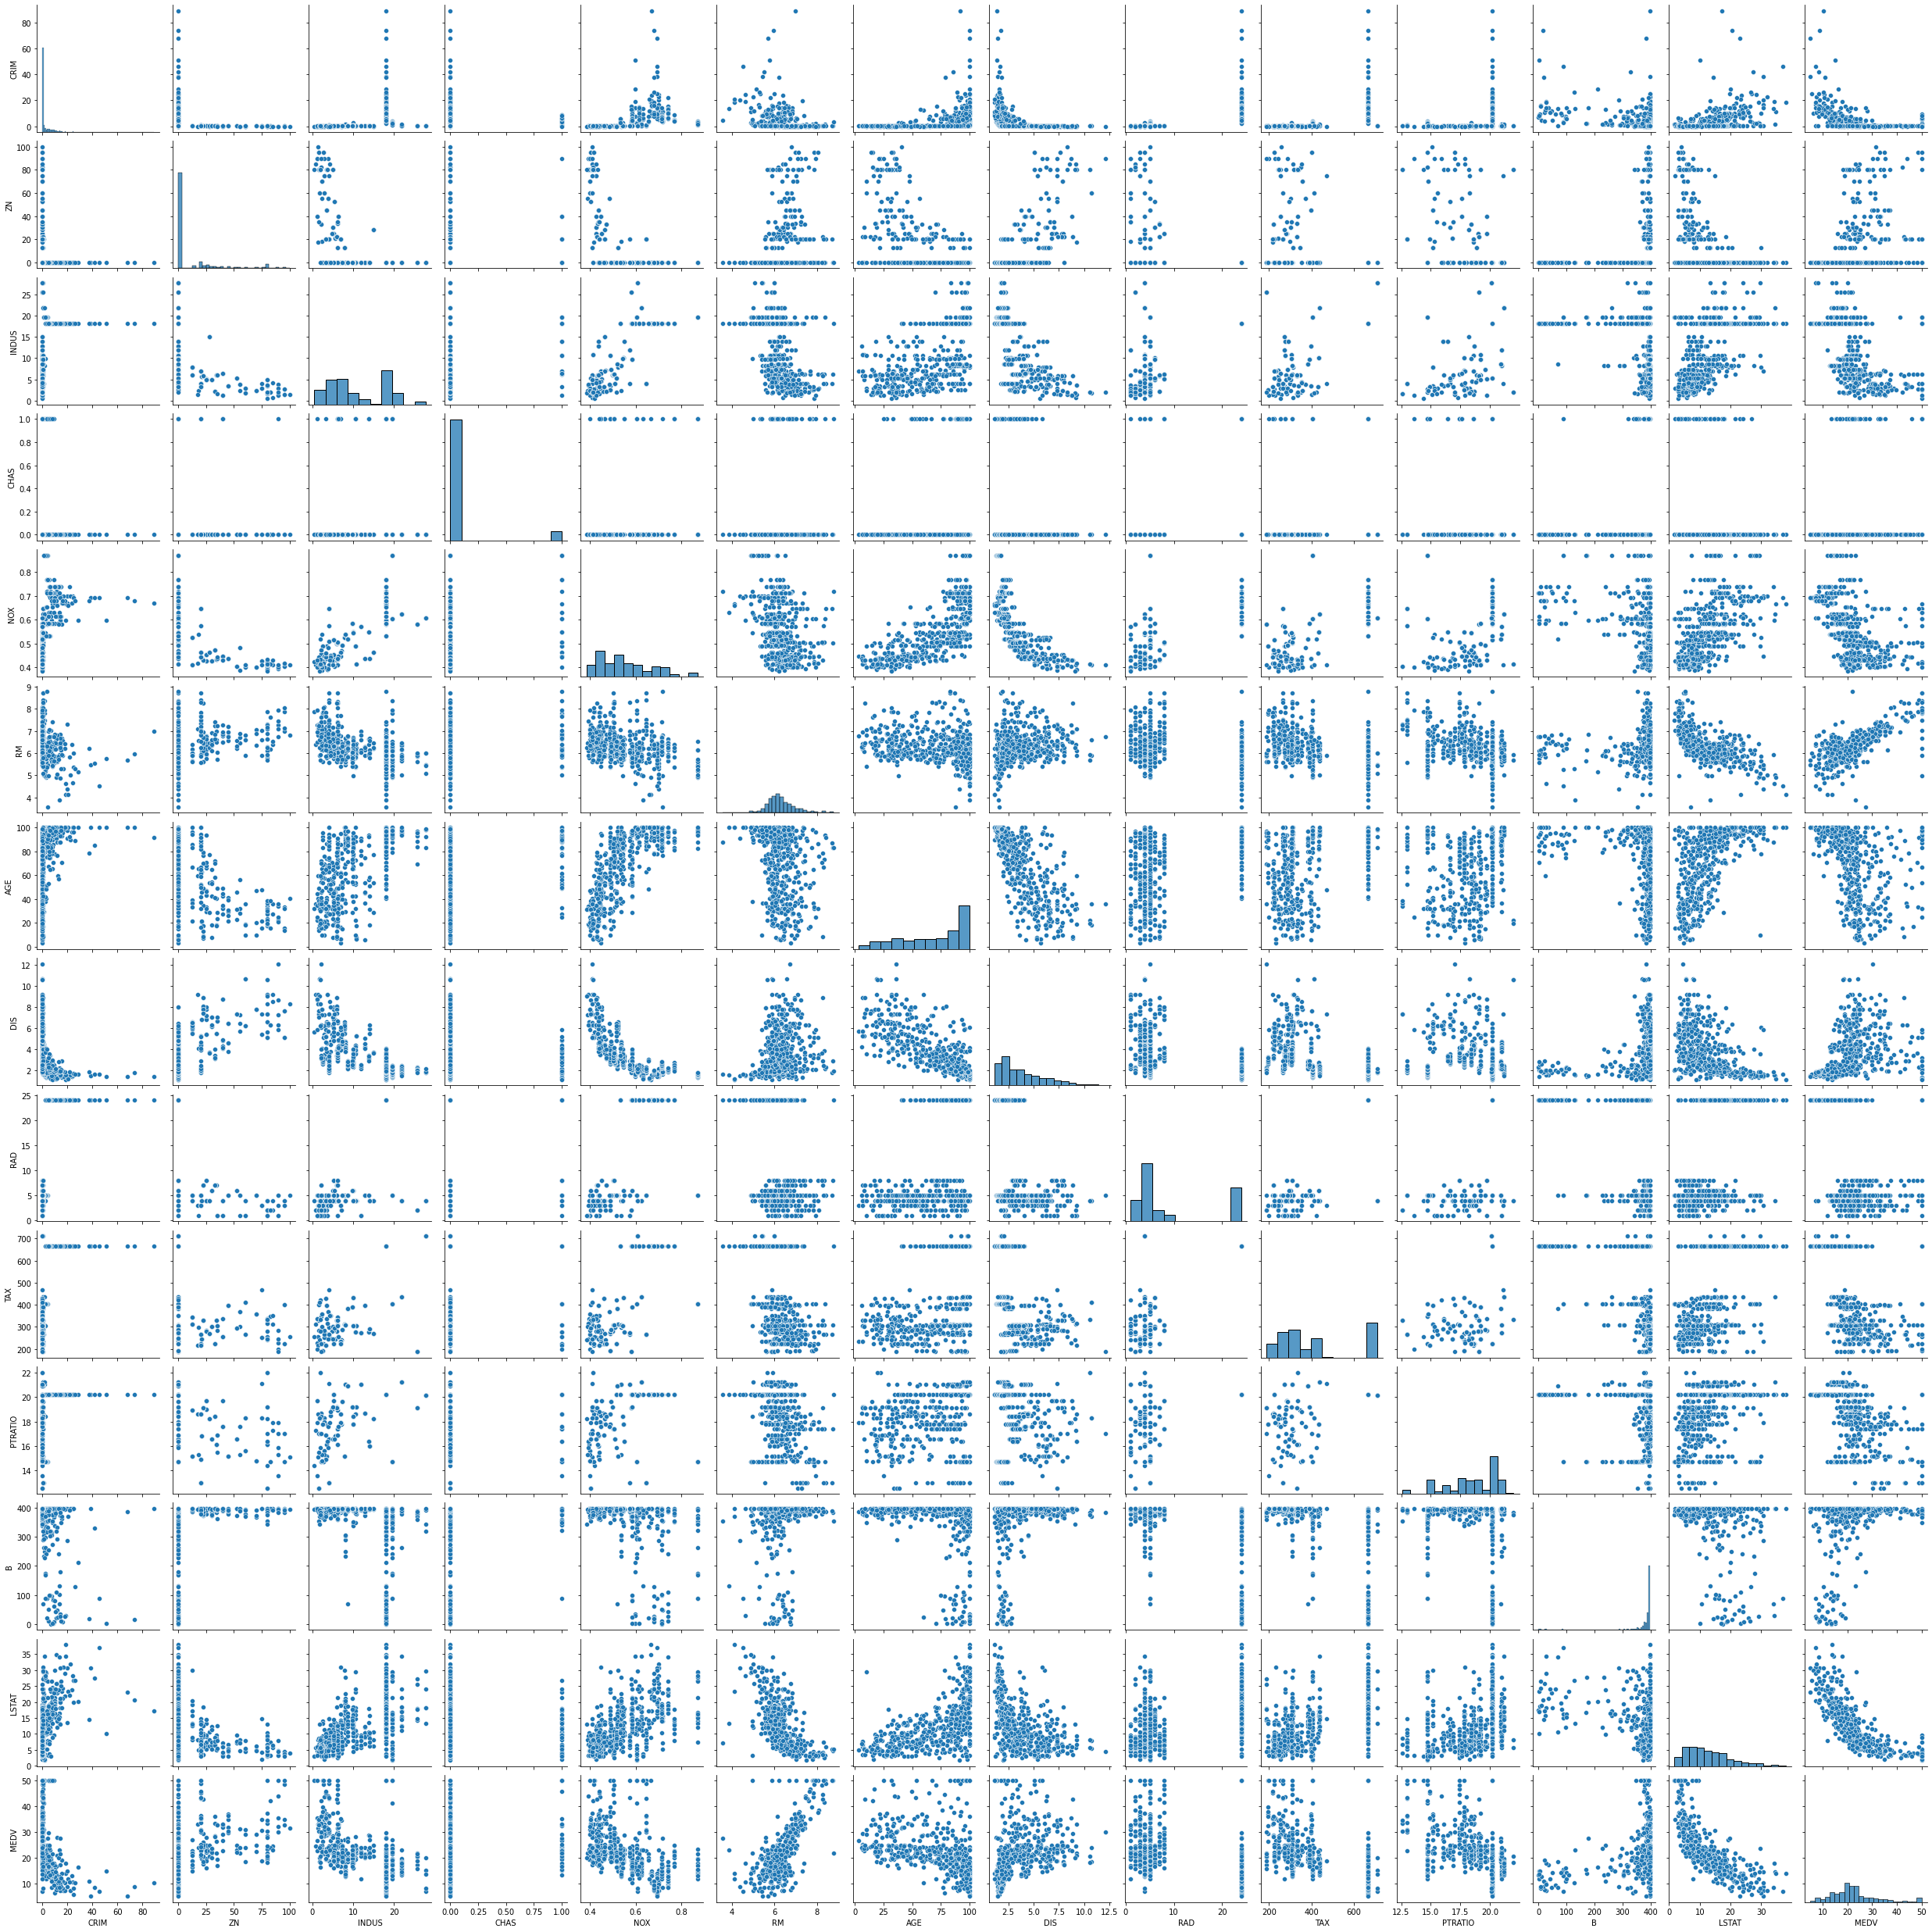

In [9]:
sns.pairplot(df_housing);

# Correlación entre variables del dataset completo.

Analizamos la correlación entre variables para ver si hay algunas que estén muy correlacionasdas y pueda afectar a nuestro modelo. También queremos ver si alguna de las variables atributo no está nada correlacionada con nuestra variable objetivo y no aporta nada al estudio.

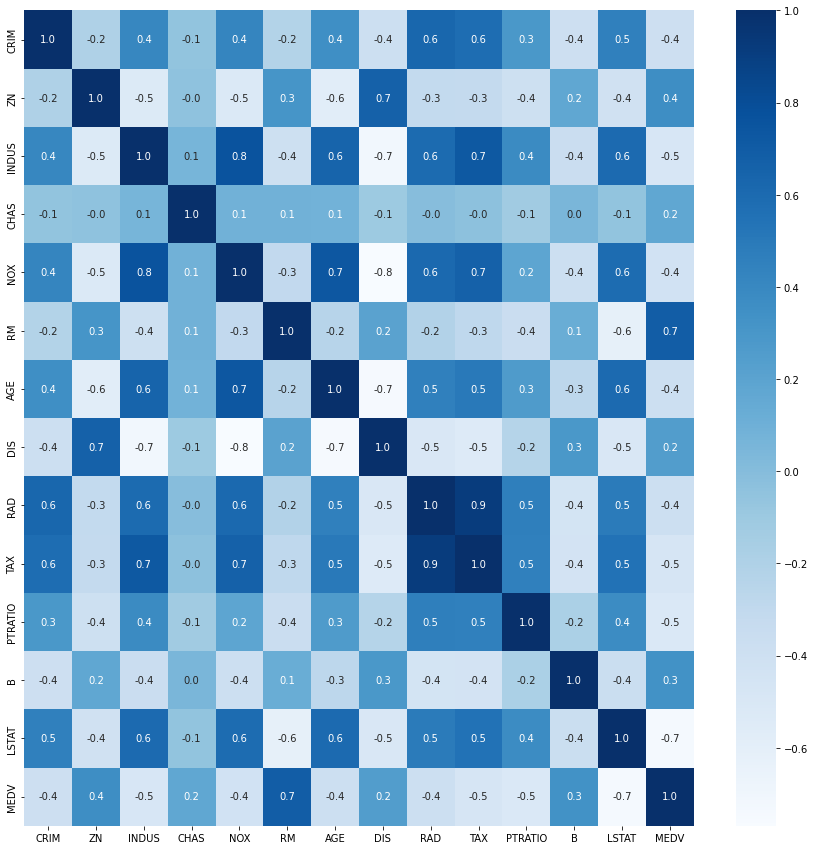

In [10]:
correlation_matrix = df_housing.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues');

# La información que extraemos de esta primera aproximación al dataset completo, junto con el resumen estadístico previo, es la siguiente:



*   La tasa de criminalidad (CRIM) y la proporción de suelo residencial (ZN)   aportan pocos datos, la mayoría son cero. 
*   La variable índice de acceso a la autopistas (RAD) es numérica ordinal.
*   La variable extensión del las orillas del río (CHAS) es binaria.
*   Salvo la distribución del valor medio de las viviendas (MEDV) y el número de habitaciones por vivienda (RM), el resto de variables tienen una distribución fuertemente asimétrica (cuartiles desequilibrados y desviaciones estardart altas) o tienen distribución no normal, necesitarán ser preprocesadas.
*   La mayorías de los datos están muy dispersos.
*  Vemos algunas correlaciones claras, lineales o polinómicas, entre estas variables:
     ◘ MEDV con RM y LSTAT
     ◘ LSTAT con NOX, RM, AGE, DIS, MEDV
     ◘ DIS con NOX, AGE, LSTAT, MEDV
     ◘ AGE con NOX, DIS, LSTAT, MEDV
     ◘ RM con LSTAT Y MEDV
     ◘ NOX con RM, AGE, DIS, LSTAT, MEDV
     ◘ CRIM con AGE, DIS, LSTST, MEDV

• No hay ninguna variable fuertemente correlacionada con nuestra variable objetivo y que influya negativamente en el estudio.



# Definimos nuestra variable objetivo/target.

A partir de este dataset queremos construir un modelo que nos permita predecir el valor medio de las casas ocupadas por sus propietarios (MEDV) en función de las características de la zona, esta será por tanto, nuestra variable respuesta.

In [11]:
y = df_housing['MEDV'].copy()
y.shape

(506,)

In [12]:
# Definimos el dataset que contiene los atributos de nuestro estudio:
X = df_housing.drop('MEDV', axis=1).copy()
X.shape

(506, 13)

Preparamos nuestro dataset para poder contruir nuestro modelo. Hacemos dos conjuntos, Train para entrenar nuestro modelo, y Test, para testear su eficacia. Tienen una proporción de 67% y 33% respectivamente.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(339, 13) (167, 13) (339,) (167,)


Estudio de la variable objetivo "Valor medio de las casas ocupadas por sus propietarios por cada 1000$".

# Estudio de la distribución.

Nuestra variable objetivo es numérica continua. Vemos qué distribución tiene originalmente y en cada conjunto Train y Test después de dividir nuestro dataset.

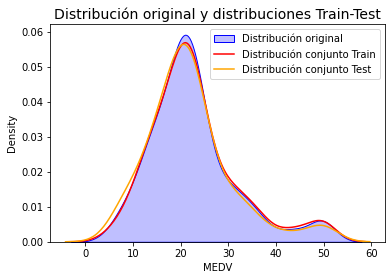

In [14]:
sns.kdeplot(df_housing['MEDV'], label='Distribución original', color='blue', fill=True)
sns.kdeplot(y_train, label='Distribución conjunto Train', color='red')
sns.kdeplot(y_test, label='Distribución conjunto Test', color='orange')
plt.title("Distribución original y distribuciones Train-Test", fontsize = 14)
plt.legend();

Vemos que tanto el conjunto Train como el conjunto Test tienen una distribución similar al conjunto original, no hace falta aplicar la técnica Data Shuffling para repartir mejor los datos.

# A continuación queremos saber si tiene una distribución normal. Planteamos las hipótesis:

Hipótesis nula H0, nuestra muestra tiene una distribución normal.               
Hipótesis H1, nuestra muestra no tiene una distribución normal.

Para validar nuestra hipótesis utilizamos el Test de distribución gaussiana Shapiro-Wilk con un alpha del 5%.

In [15]:
from scipy.stats import shapiro
def distribucion_normal(data):
    stat, p = shapiro(data)
    print('stat=%.3f, p-value=%.20f' % (stat, p))
    if p > 0.05:
        print('Aceptamos la hipótesis nula H0: Probablemente Gaussiana')
    else:
        print('Rechazamos la hipótesis nula H0, nos quedamos con la alternativa H1: Probablemente no Gaussiana')

In [16]:
distribucion_normal(y)

stat=0.917, p-value=0.00000000000000049400
Rechazamos la hipótesis nula H0, nos quedamos con la alternativa H1: Probablemente no Gaussiana


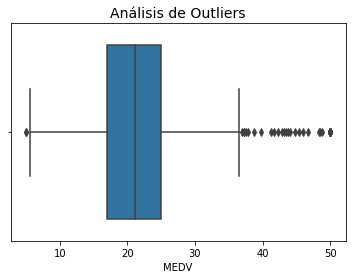

In [17]:
# Estudio de la simetría, la forma y los outliers:
sns.boxplot(x = y)
plt.title("Análisis de Outliers", fontsize = 14);

In [18]:
skewness = y.skew()
kurtosis = y.kurtosis()
print(f'Kurtosis= {kurtosis}', f'Skewness= {skewness}' )

Kurtosis= 1.495196944165818 Skewness= 1.1080984082549072


In [19]:
y.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

Ahora sabemos que nuestro target tiene una distribución no normal, asimétrica, con una asimetría positva (skewness con valores positivos). La curtosis positiva indica que tiene valores atípicos y que tiene una cola más alargada, la derecha. Es una variable con outliers y con poca dispersión.

Necesita un preprocesado con Robust Scaler

# Analizamos los atributos o variables independientes.

Para analizar cada atributo vamos a hacer una gráfica con sus distribuciones en el dataset original y después de dividir el dataset, tanto en el conjunto Train como en el conjunto Test. Para analizar los outliners hacemos un boxplot.

Hacemos un dataframe con los nombres de las columnas a estudiar para poder poner título a los gráficos con más comodidad.

In [20]:
df_atributos = pd.DataFrame(
    {'columnas':['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'],  
     'definiciones':['Tasa de criminalidad per capita por ciudad', 'Proporción de suelo residencial cada 25.000 pies cuadrados', 'Proporción de negocios mayoristas por acres', 'Concentración de óxido nitrítico (partes por 10 millones)', 'Media del número de habitaciones por vivienda', 'Proporción de viviendas contruidas antes de 1940 y habitadas por sus propietarios', 'Distancias ponderadas a cinco centros de empleos de Boston', 'Impuesto sobre el valor total de la propiedad por cada 10.000$', 'Ratio de alumnos por profesor', '1000(Bk - 0.63)^2 siendo Bk la proporción de ciudadanos negros por ciudad', 'Porcentaje de población bajo nivel adquisitivo']})
df_atributos.set_index('columnas', inplace=True)
df_atributos.head()

,definiciones
columnas,
CRIM,Tasa de criminalidad per capita por ciudad
ZN,Proporción de suelo residencial cada 25.000 pi...
INDUS,Proporción de negocios mayoristas por acres
NOX,Concentración de óxido nitrítico (partes por 1...
RM,Media del número de habitaciones por vivienda


In [21]:
 # hacemos una lista con los atributos que vamos a analizar:
atributos = list(df_atributos.index)  

In [22]:
def analisis_atributo(colum):
    print('Análisis del atributo', df_atributos.definiciones[colum])
    print('')
    print('Análisis estadístico')
    # análisis estadístico
    print(X[colum].describe())
    print('')
    skewness = X[colum].skew()
    kurtosis = X[colum].kurtosis()
    print(f'Kurtosis= {kurtosis}')
    print(f'Skewness= {skewness}')
    print('')
    print('Test de normalidad')
    distribucion_normal(X_train[colum])
    print('')
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
    axes = axes.flat    
    # análisis de la distibución
    sns.kdeplot(X[colum], label='Distribución original', color='gray', fill=True, ax = axes[0])
    sns.kdeplot(X_train[colum], label='Distribución conjunto Train', color='red', ax = axes[0])
    sns.kdeplot(X_test[colum], label='Distribución conjunto Test', color='blue', ax = axes[0])    
    axes[0].set_title("Distribución original (gris) y distribuciones Train (rojo) y Test (azul)", fontsize = 16)
    axes[0].set_xlabel(df_atributos.definiciones[colum], fontsize= 16) 
    axes[0].tick_params(labelsize = 10)
    print('')
    # análisis de los outliers
    sns.boxplot(x = X_train[colum])
    axes[1].set_title("Análisis de Outliers en el conjunto Train", fontsize = 16)
    axes[1].set_xlabel(df_atributos.definiciones[colum], fontsize = 16) 
    axes[1].tick_params(labelsize = 16)
    # análisis de la relación con la variable objetivo
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))
    sns.regplot(
        x           = y_train,
        y           = X_train[colum],
        color       = "black",
        marker      = 'o',
        scatter_kws = {"alpha":0.7},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes
    )
    axes.set_title(f"Valor medio de las casas ocupadas por sus propietarios por cada 1000$ y {df_atributos.definiciones[colum]}", fontsize = 16)
    axes.tick_params(labelsize = 12)
    axes.set_xlabel("Valor medio de las casas ocupadas por sus propietarios por cada 1000$", fontsize = 16)

Análisis del atributo Tasa de criminalidad per capita por ciudad

Análisis estadístico
count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

Kurtosis= 37.13050912952203
Skewness= 5.223148798243851

Test de normalidad
stat=0.428, p-value=0.00000000000000000000
Rechazamos la hipótesis nula H0, nos quedamos con la alternativa H1: Probablemente no Gaussiana




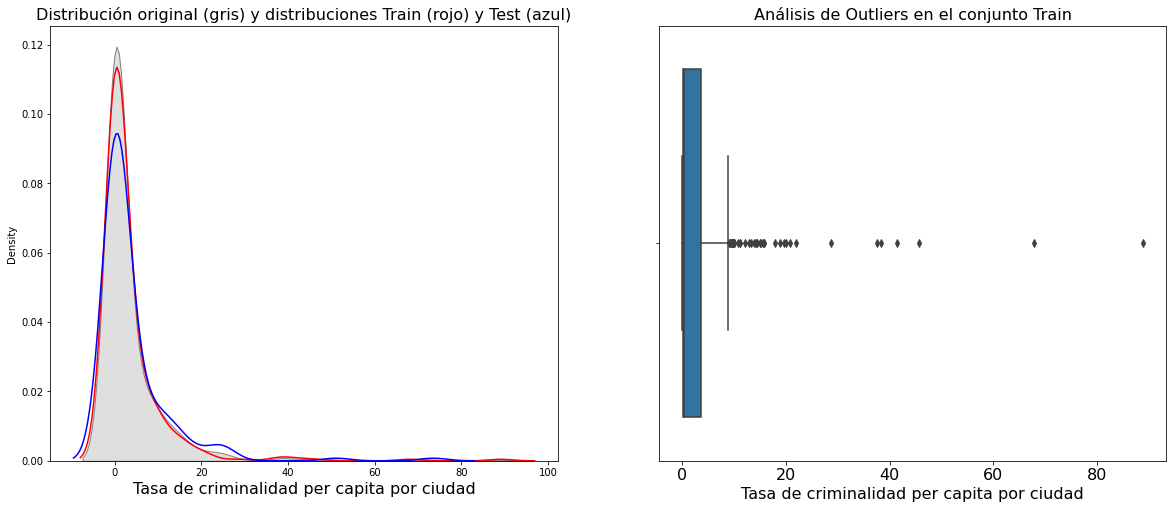

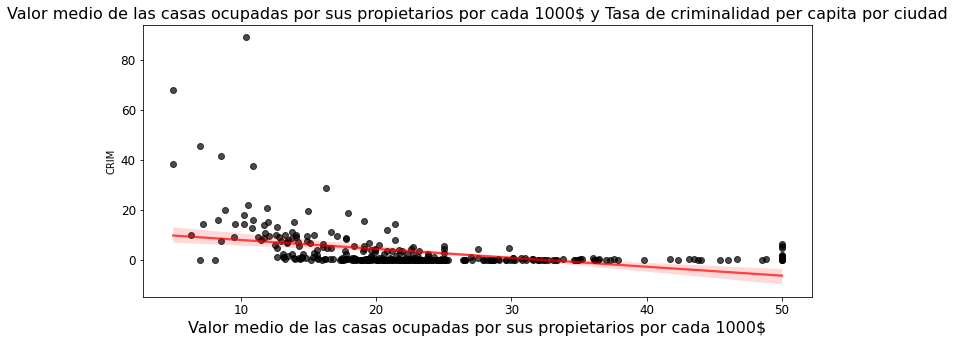

In [23]:
colum = 'CRIM'
analisis_atributo(colum)

La Tasa de criminalidad tiene una distribución unimodal no normal con una gran asimetría positiva, valor alto de skewness, debido a que la mayoría de sus valores son cero. También vemos una curtosis alta porque tiene valores atípicos y outliers. El resto de valores están muy dispersos.
La relación con la variable objetivo es lineal, la mayor criminalidad se da en zonas donde el valor medio de las viviendas es menor y a partir de cierto valor (alrededor de 25.000$) es casi inexistente.

# Proponemos un preprocesado con Robust Scaler para controlar los outliers.

Análisis del atributo Proporción de suelo residencial cada 25.000 pies cuadrados

Análisis estadístico
count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64

Kurtosis= 4.031510083739155
Skewness= 2.2256663227354307

Test de normalidad
stat=0.567, p-value=0.00000000000000000000
Rechazamos la hipótesis nula H0, nos quedamos con la alternativa H1: Probablemente no Gaussiana




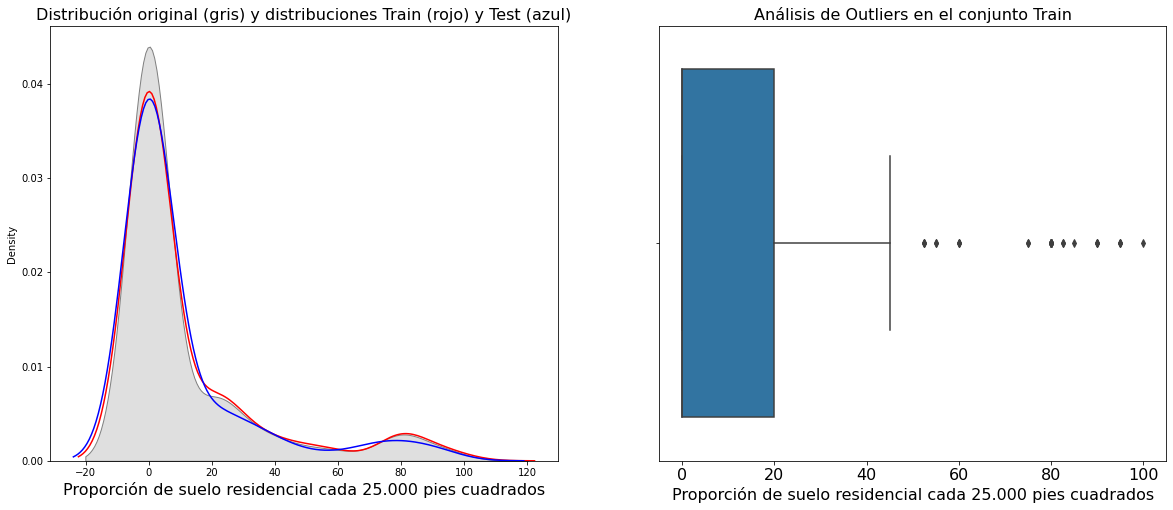

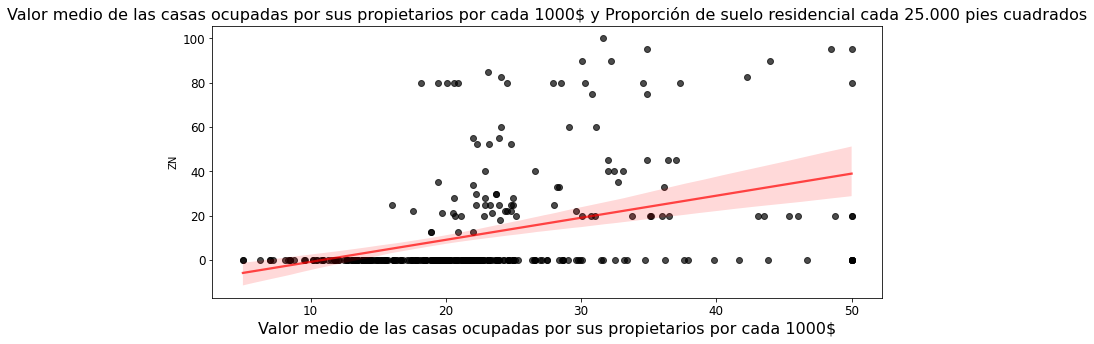

In [24]:
colum = 'ZN'
analisis_atributo(colum)

La distribución de la variable Proporción de suelo residencial es unimodal no normal, asimétrica positiva, con outliers.

La mayoría de los datos son cero, como si no se hubiera valorado en la mayoría de registros, el resto de datos no tienen una relación con una pauta con nuestra variable. Queda excluida en este ejercicio de nuestro modelo.

Análisis del atributo Proporción de negocios mayoristas por acres

Análisis estadístico
count    506.000000
mean      11.136779
std        6.860353
min        0.460000
25%        5.190000
50%        9.690000
75%       18.100000
max       27.740000
Name: INDUS, dtype: float64

Kurtosis= -1.2335396011495188
Skewness= 0.29502156787351164

Test de normalidad
stat=0.894, p-value=0.00000000000001316048
Rechazamos la hipótesis nula H0, nos quedamos con la alternativa H1: Probablemente no Gaussiana




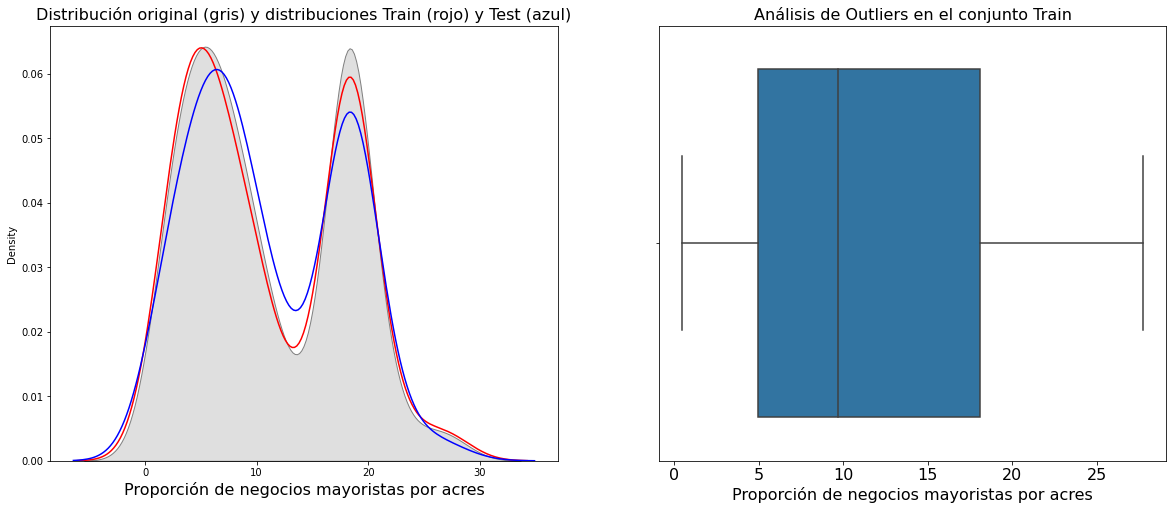

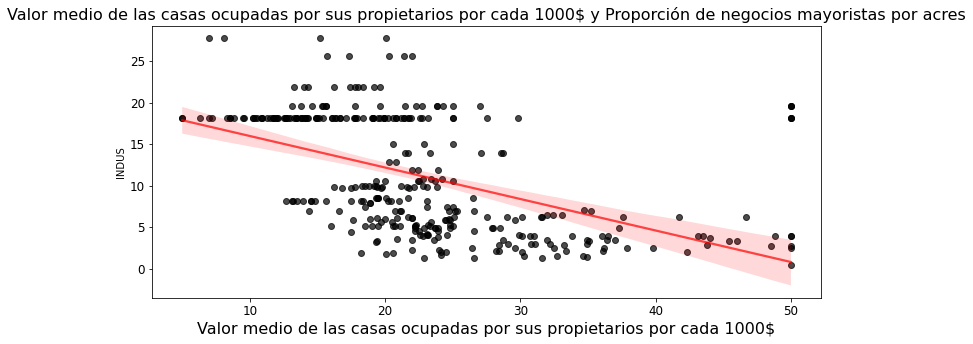

In [25]:
colum = 'INDUS'
analisis_atributo(colum)

La variable Proporción de negocios mayoristas tiene una distribución bimodal no gaussiana, con alta dispersión en sus valores, sin outliers.

# Proponemos una normalización con StandardScaler:

Análisis del atributo Concentración de óxido nitrítico (partes por 10 millones)

Análisis estadístico
count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: NOX, dtype: float64

Kurtosis= -0.06466713336542629
Skewness= 0.7293079225348787

Test de normalidad
stat=0.941, p-value=0.00000000022267131194
Rechazamos la hipótesis nula H0, nos quedamos con la alternativa H1: Probablemente no Gaussiana




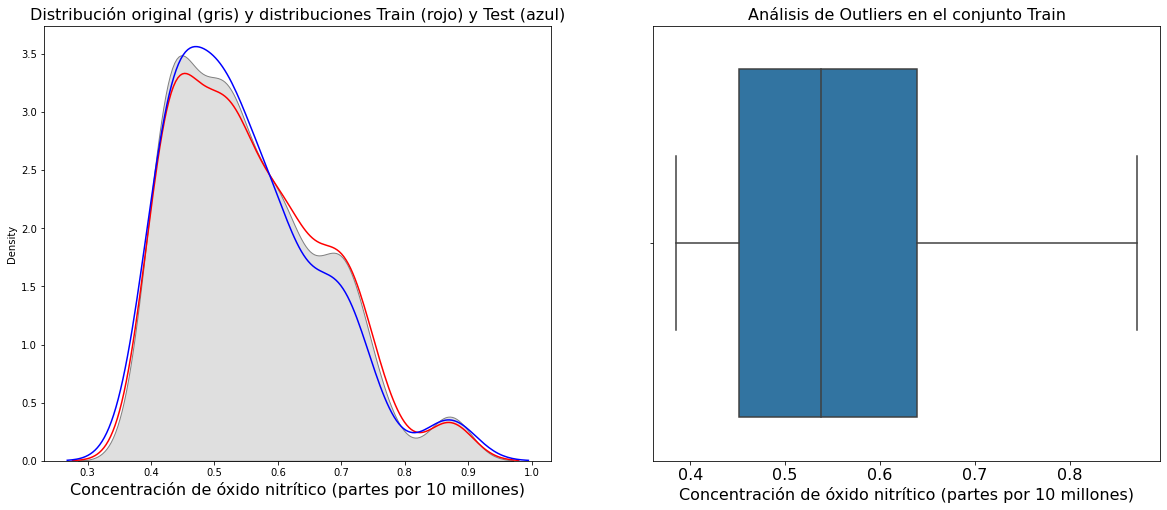

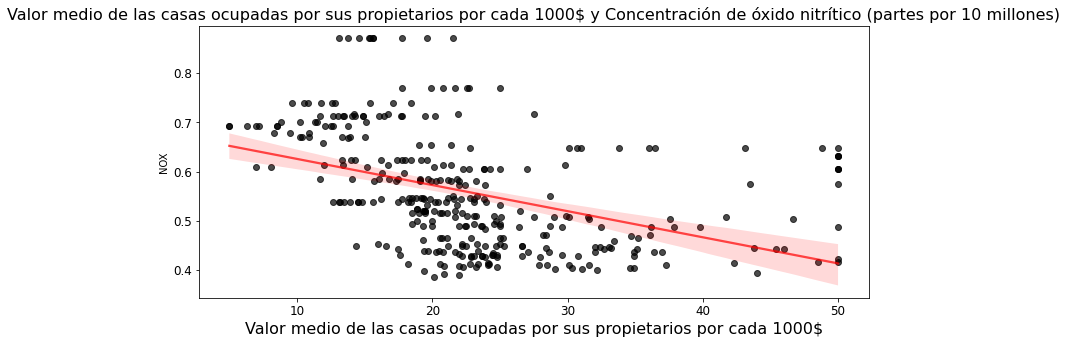

In [26]:
colum = 'NOX'
analisis_atributo(colum)

La variable Concentración de óxido nitrítico tiene una distribución unimodal no gaussiana, con alta dispersión en sus valores, sin outliers.

# Proponemos una normalización con MinMaxScaler:

Análisis del atributo Media del número de habitaciones por vivienda

Análisis estadístico
count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

Kurtosis= 1.8915003664993404
Skewness= 0.40361213328874385

Test de normalidad
stat=0.966, p-value=0.00000047729332663948
Rechazamos la hipótesis nula H0, nos quedamos con la alternativa H1: Probablemente no Gaussiana




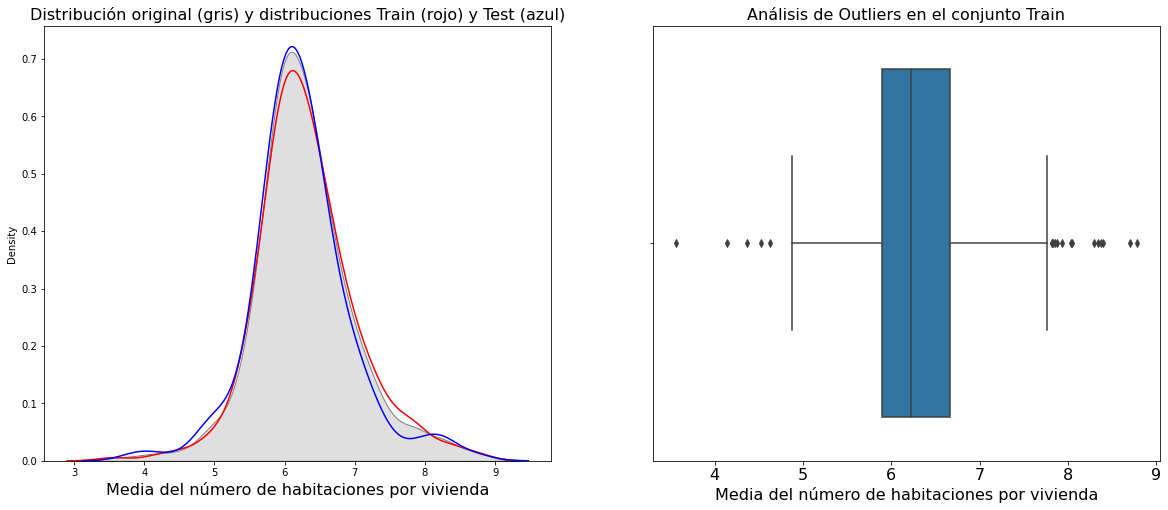

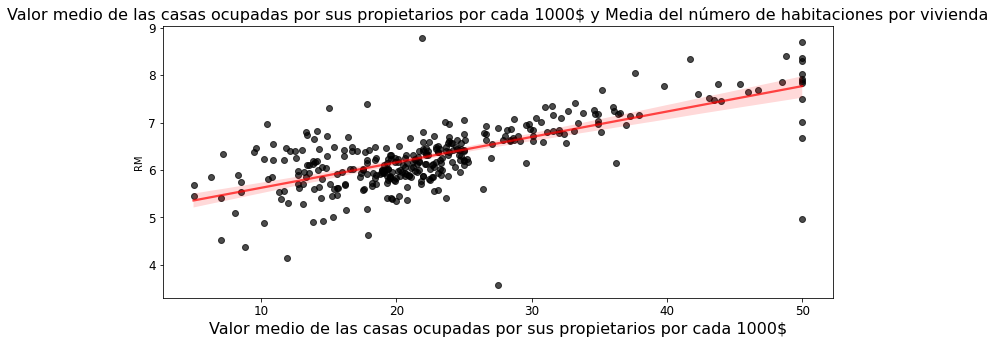

In [27]:
colum = 'RM'
analisis_atributo(colum)

La Media del número de habitaciones por vivienda tiene una distribución unimodal no normal con una kurtosis acentuada que refleja valores atípicos. Estos valores se observan en la gráficas como outliers y como un grupo de viviendas con alto valor, independientemente del número de habitaciones, pueden indicar un mala toma de datos.

La relación con la variable objetivo es evidente y lineal, a mayor número de habitaciones el valor medio de las viviendas aumenta.

# Proponemos un preprocesado con Robust Scaler para tratar los valores atípicos.

Análisis del atributo Proporción de viviendas contruidas antes de 1940 y habitadas por sus propietarios

Análisis estadístico
count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64

Kurtosis= -0.9677155941626912
Skewness= -0.5989626398812962

Test de normalidad
stat=0.886, p-value=0.00000000000000328755
Rechazamos la hipótesis nula H0, nos quedamos con la alternativa H1: Probablemente no Gaussiana




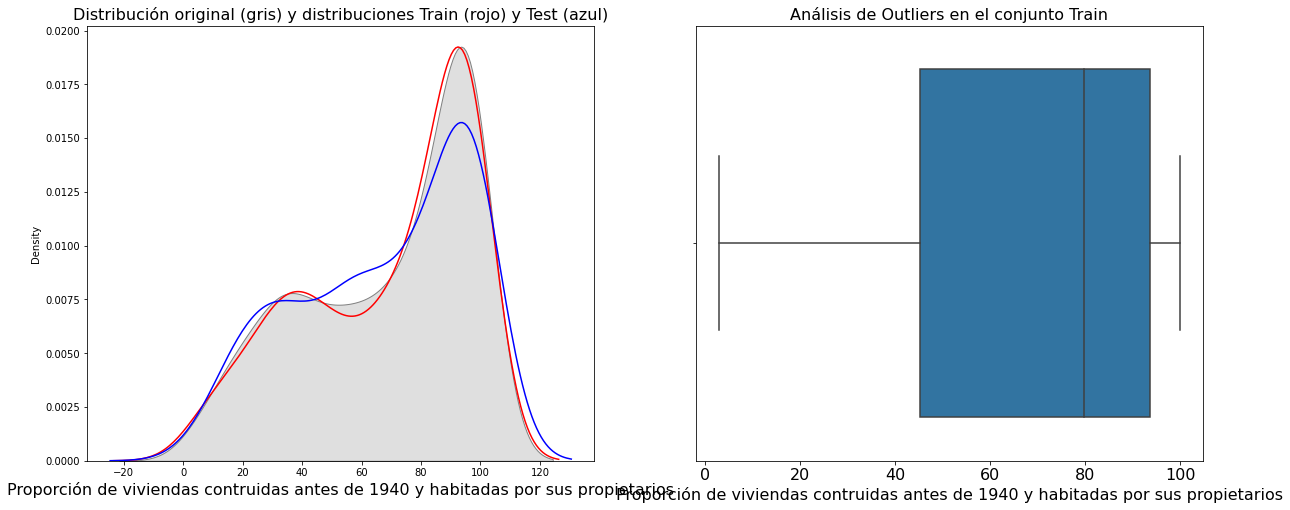

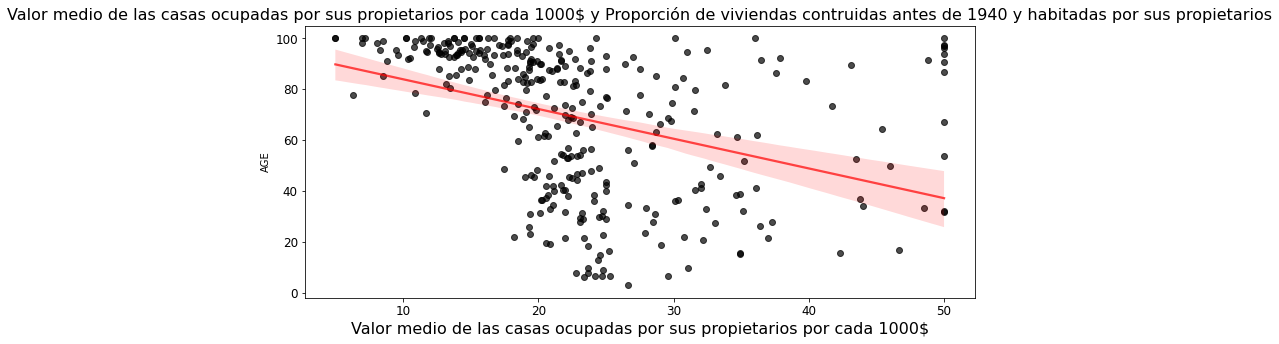

In [28]:
colum = 'AGE'
analisis_atributo(colum)

La distribución de la proporción de viviendas construidas antes de 1940 tiene una distribución bimodal no gaussiana con asimetría negativa y curtosis negativa, valores atípicos sin outliers y una alta dispersión.

# Proponemos una normalización con MinMaxScaler.

Análisis del atributo Distancias ponderadas a cinco centros de empleos de Boston

Análisis estadístico
count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: DIS, dtype: float64

Kurtosis= 0.4879411222443908
Skewness= 1.0117805793009007

Test de normalidad
stat=0.894, p-value=0.00000000000001347915
Rechazamos la hipótesis nula H0, nos quedamos con la alternativa H1: Probablemente no Gaussiana




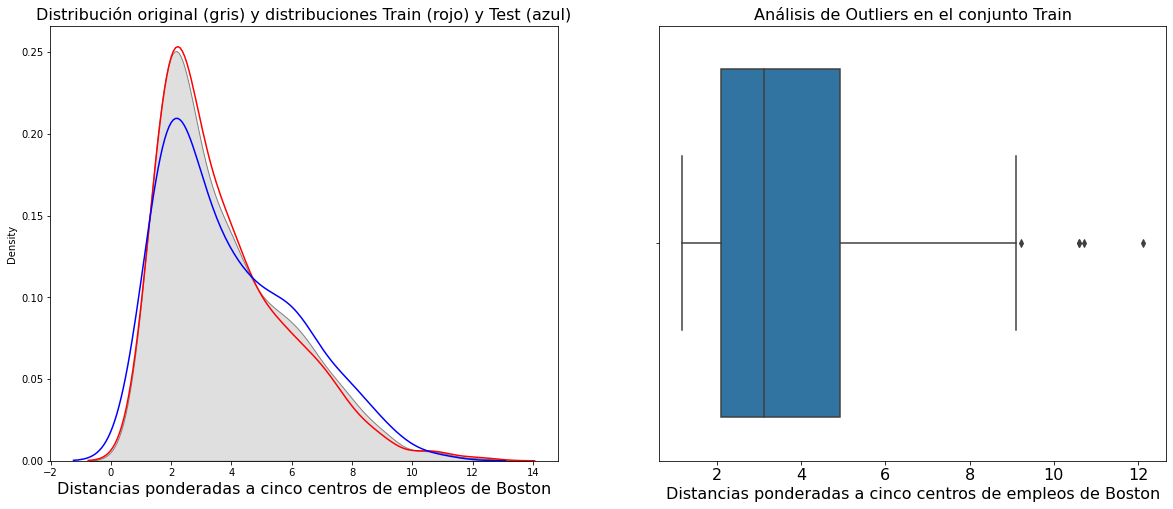

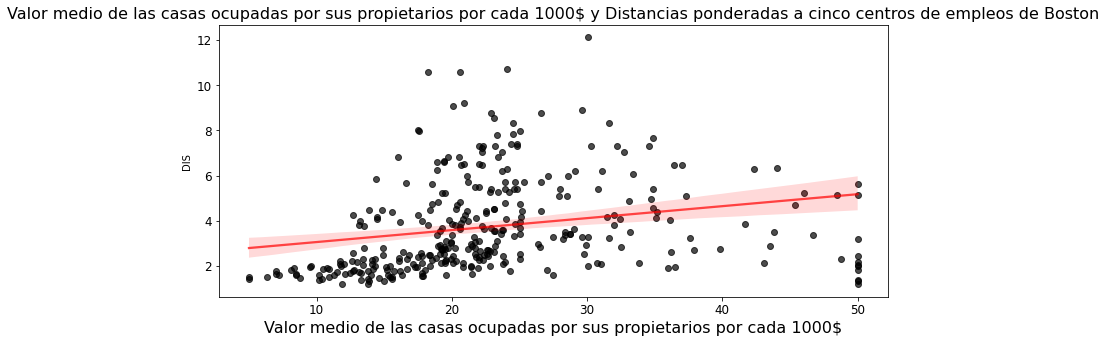

In [29]:
colum = 'DIS'
analisis_atributo(colum)

La distribución de la variable Distancias ponderadas a cinco centros de empleo es unimodal no normal, asimétrica positiva, con algún outlier.

Observamos que tiene relación con nuestra variable objetivo, a menos distancia menos valor medio.

# Proponemos un preprocesado con Robust Scaler:

Análisis del atributo Impuesto sobre el valor total de la propiedad por cada 10.000$

Análisis estadístico
count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: TAX, dtype: float64

Kurtosis= -1.1424079924768082
Skewness= 0.669955941795016

Test de normalidad
stat=0.809, p-value=0.00000000000000000010
Rechazamos la hipótesis nula H0, nos quedamos con la alternativa H1: Probablemente no Gaussiana




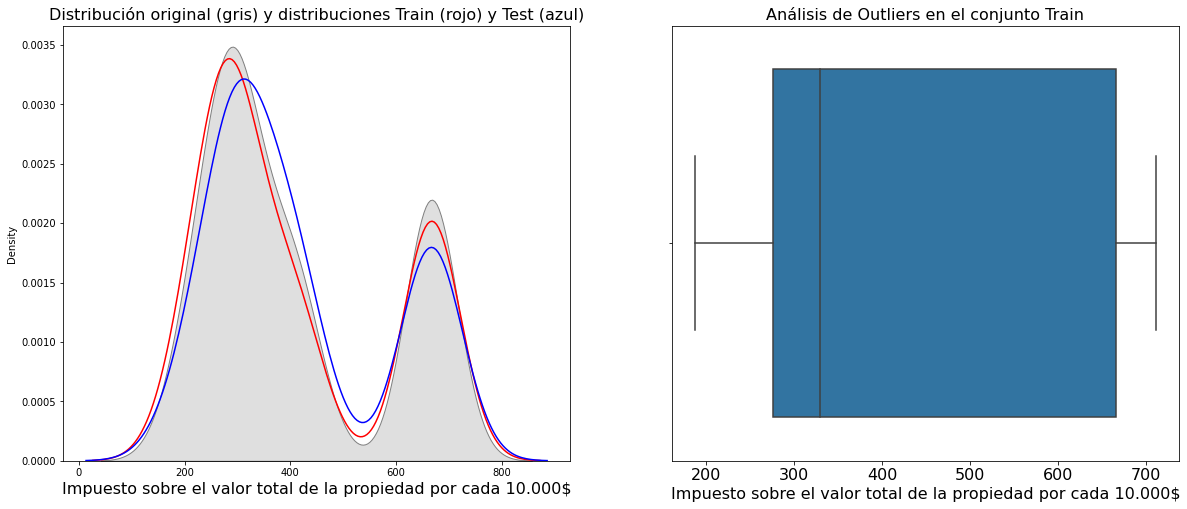

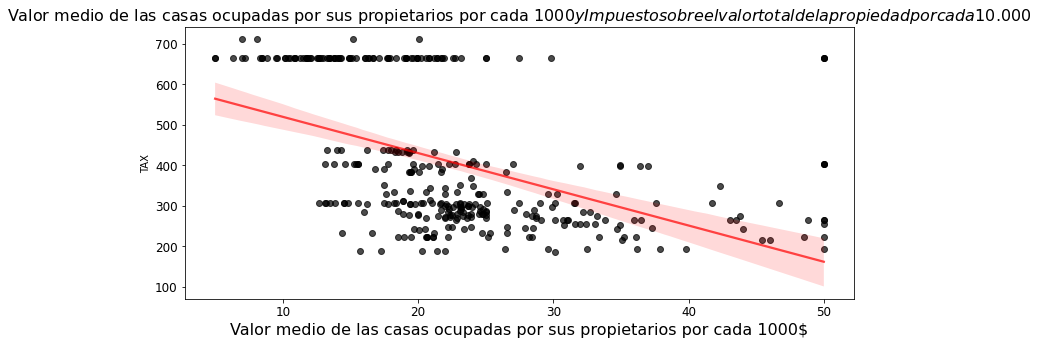

In [30]:
colum = 'TAX'
analisis_atributo(colum)

Impuesto sobre el valor total de la propiedad tiene una distribución bimodal no gaussiana, con alta dispersión en sus valores, sin outliers.

# Proponemos una normalización con MinMax Scaler.

Análisis del atributo Ratio de alumnos por profesor

Análisis estadístico
count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

Kurtosis= -0.28509138330538875
Skewness= -0.8023249268537809

Test de normalidad
stat=0.896, p-value=0.00000000000001966621
Rechazamos la hipótesis nula H0, nos quedamos con la alternativa H1: Probablemente no Gaussiana




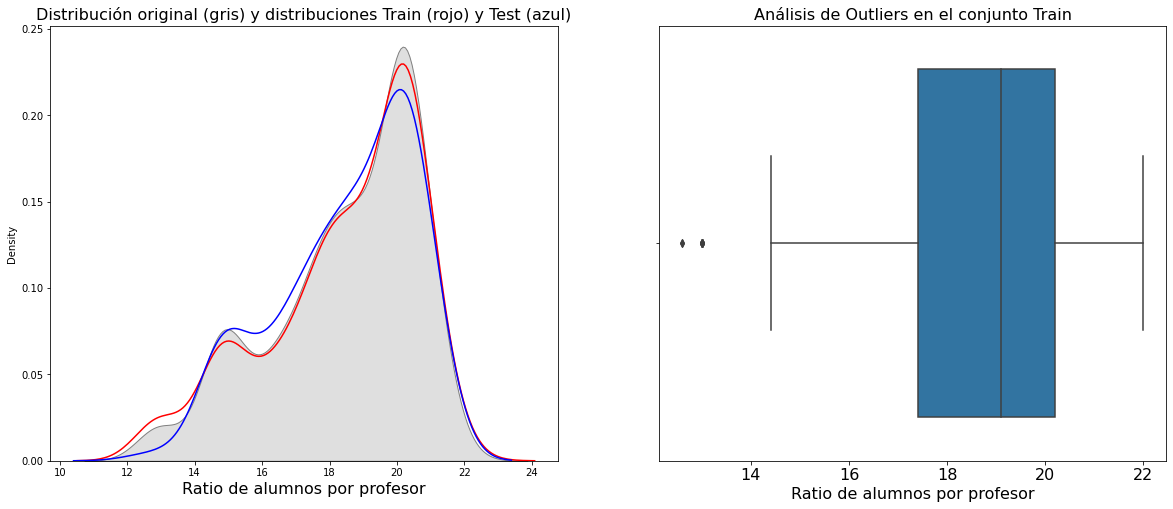

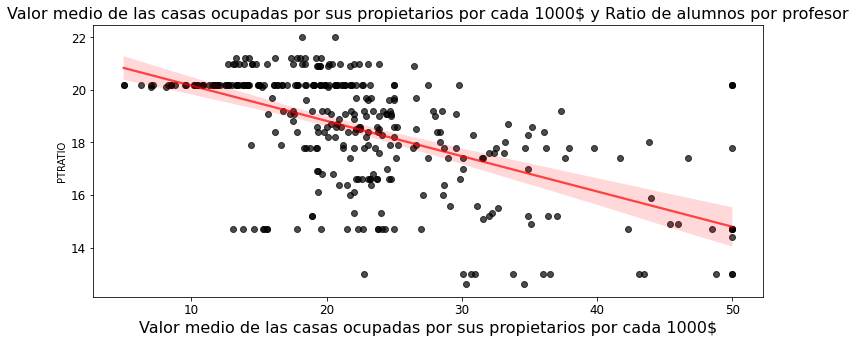

In [31]:
colum = 'PTRATIO'
analisis_atributo(colum)

La variable Ratio de alumno por profesor no tiene relación con nuestra variable objetivo, la dejamos fuera en este ejercicio del estudio de nuestro modelo.

Análisis del atributo 1000(Bk - 0.63)^2 siendo Bk la proporción de ciudadanos negros por ciudad

Análisis estadístico
count    506.000000
mean     356.674032
std       91.294864
min        0.320000
25%      375.377500
50%      391.440000
75%      396.225000
max      396.900000
Name: B, dtype: float64

Kurtosis= 7.226817549260753
Skewness= -2.8903737121414492

Test de normalidad
stat=0.460, p-value=0.00000000000000000000
Rechazamos la hipótesis nula H0, nos quedamos con la alternativa H1: Probablemente no Gaussiana




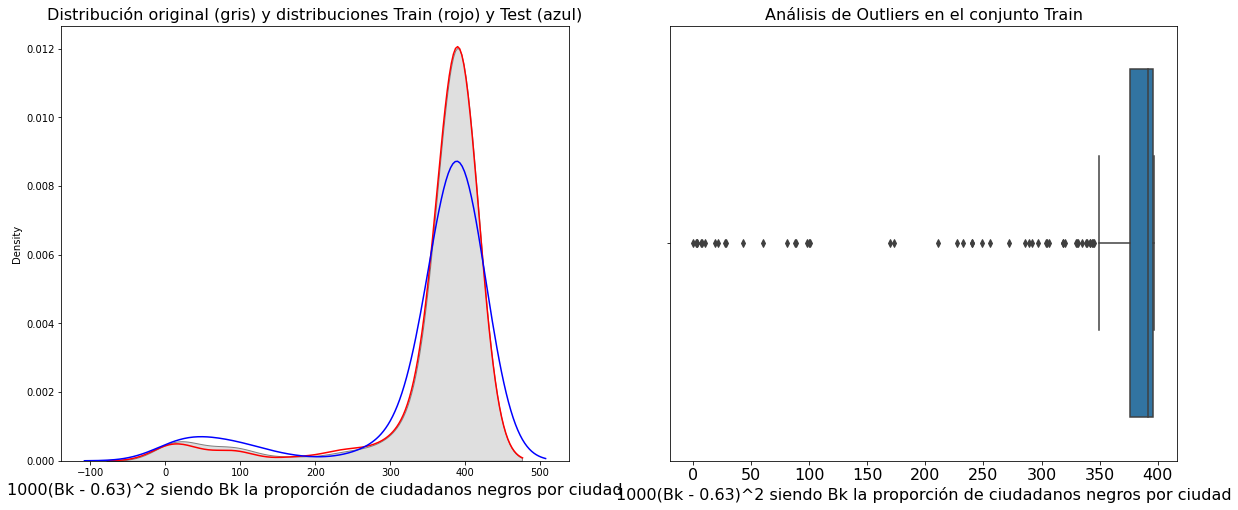

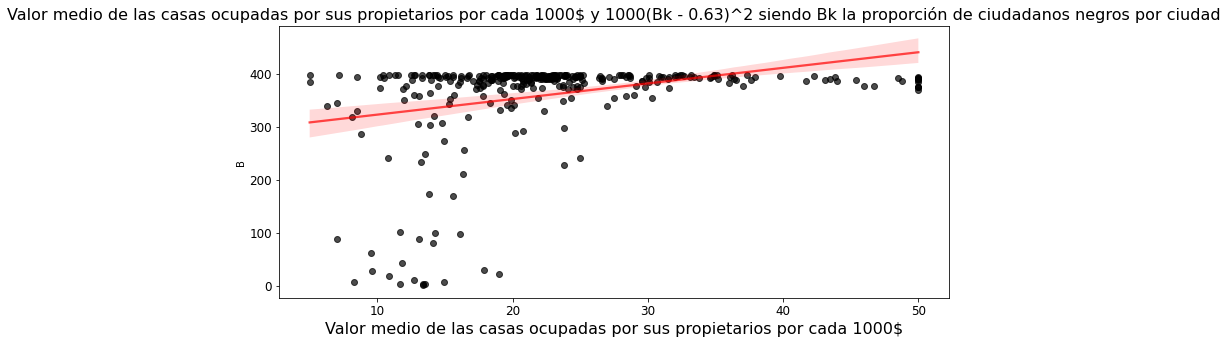

In [32]:
colum = 'B'
analisis_atributo(colum)

La Proporción de ciudadanos negros tiene una distribución unimodal asimétrica con una gran grupo de los valores en torno a un mismo rango de entre 300 y 400. Tiene outliers.

# Proponemos un preprocesado con Robust Scaler.

Análisis del atributo Porcentaje de población bajo nivel adquisitivo

Análisis estadístico
count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: LSTAT, dtype: float64

Kurtosis= 0.49323951739272776
Skewness= 0.9064600935915367

Test de normalidad
stat=0.939, p-value=0.00000000014102023715
Rechazamos la hipótesis nula H0, nos quedamos con la alternativa H1: Probablemente no Gaussiana




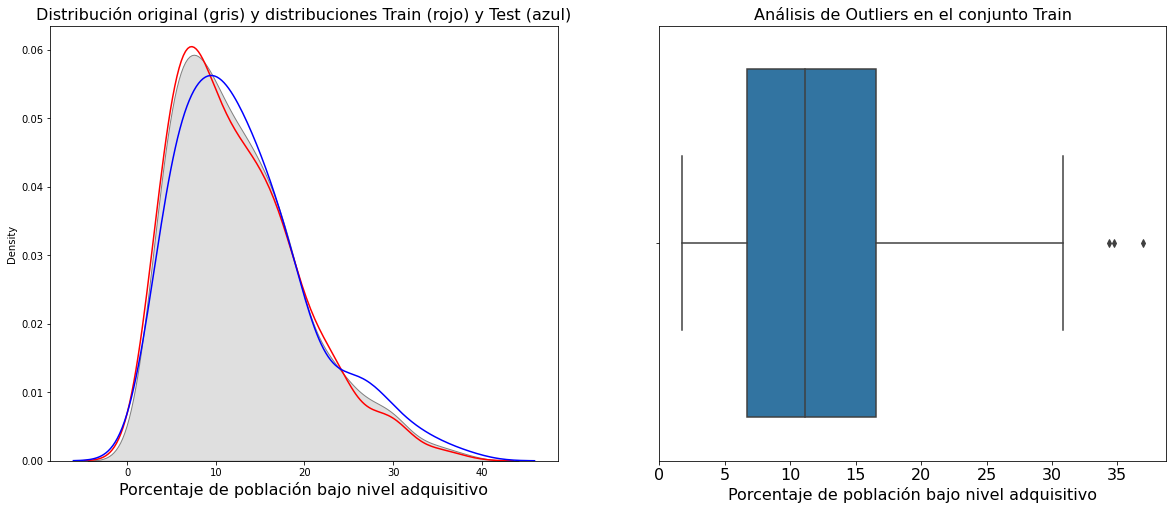

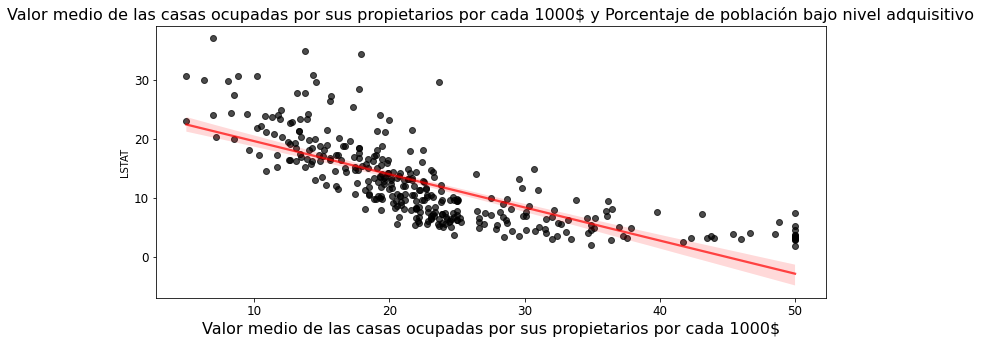

In [33]:
colum = 'LSTAT'
analisis_atributo(colum)

La distribucion de la variable Nivel adquisito es unimodal no normal, con outliers.
Tiene una fuerte relación lineal con el Valor medio de la vivienda.

Proponemos un preprocesados con Robust Scaler.

#  Ejercicio 2:

Aplica algún proceso de transformación (estandarizar los datos numéricos, crear columnas dummies, polinomios...).

In [34]:
# Creamos un dataset para filtrar las columnas con las que no vamos a trabajar y hacer las transformaciones.
X_trainFS = X_train.drop(['ZN','PTRATIO'] , axis=1).copy()
X_testFS = X_test.drop(['ZN','PTRATIO'] , axis=1).copy()

# Preprocesado de nuestros datos, Feature Scaling:

Ya tenemos el estudio de todas nuestras variables, vamos a preprocesarlas. El preprocesado debe hacerse para ambos conjuntos con los que vamos a entrenar y validar nuestro modelo.

In [35]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Variable Índice de accesibilidad a las autopistas radiales:

Esta variable es numérica ordinal, sólo puede tomar un rango de valores. Aplicamos un proceso de dummificación.

In [36]:
# valores únicos de RED
X_trainFS.RAD.unique()

array([ 4, 24,  1,  5,  6,  8,  3,  2,  7])

In [37]:
X_trainFS.RAD.nunique() 

9

In [38]:
 # total de registros por valor
X_trainFS.RAD.value_counts()

24    89
4     78
5     75
3     27
6     17
2     16
1     14
8     14
7      9
Name: RAD, dtype: int64

# Conjunto Train

In [39]:
# creamos las columnas dummies
dummy_RAD = pd.get_dummies(X_trainFS["RAD"], prefix="RAD")
# eliminamos la variable RAD
X_trainFS = X_trainFS.drop(["RAD"], axis = 1)
# Añadimos las columnas dummies creadas al dataset original.
X_trainFS = pd.concat([X_trainFS, dummy_RAD], axis = 1)
X_trainFS.head()

,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,B,LSTAT,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
81,0.04462,4.86,0,0.426,6.619,70.4,5.4007,281.0,395.63,7.22,0,0,0,1,0,0,0,0,0
360,4.54192,18.10,0,0.770,6.398,88.0,2.5182,666.0,374.56,7.79,0,0,0,0,0,0,0,0,1
394,13.35980,18.10,0,0.693,5.887,94.7,1.7821,666.0,396.90,16.35,0,0,0,0,0,0,0,0,1
194,0.01439,2.93,0,0.401,6.604,18.8,6.2196,265.0,376.70,4.38,1,0,0,0,0,0,0,0,0
477,15.02340,18.10,0,0.614,5.304,97.3,2.1007,666.0,349.48,24.91,0,0,0,0,0,0,0,0,1


# Conjunto Test:

In [40]:
# creamos las columnas dummies
dummy_RAD = pd.get_dummies(X_testFS["RAD"], prefix="RAD")
# eliminamos la variable RAD
X_testFS = X_testFS.drop(["RAD"], axis = 1)
# Añadimos las columnas dummies creadas al dataset original.
X_testFS = pd.concat([X_testFS, dummy_RAD], axis = 1)
X_testFS.head()

,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,B,LSTAT,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
329,0.06724,3.24,0,0.460,6.333,17.2,5.2146,430.0,375.21,7.34,0,0,0,1,0,0,0,0,0
371,9.23230,18.10,0,0.631,6.216,100.0,1.1691,666.0,366.15,9.53,0,0,0,0,0,0,0,0,1
219,0.11425,13.89,1,0.550,6.373,92.4,3.3633,276.0,393.74,10.50,0,0,0,0,1,0,0,0,0
403,24.80170,18.10,0,0.693,5.349,96.0,1.7028,666.0,396.90,19.77,0,0,0,0,0,0,0,0,1
78,0.05646,12.83,0,0.437,6.232,53.7,5.0141,398.0,386.40,12.34,0,0,0,0,1,0,0,0,0


# Variable Extensión de las orilas del Río Charles.

Esta variable es una variable dummie, no necesita preprocesado.

Variables con distribución no normal sin outliers, preprocesado para normalizar las distribuciones con MinMaxScaler.

Dataset Train.

In [41]:
variablesNorm = ['INDUS', 'AGE', 'TAX', 'NOX']
mms = MinMaxScaler(feature_range = (0, 1))
X_trainFS[variablesNorm] = mms.fit_transform(X_train[variablesNorm])

# Dataset Test:

In [42]:
X_testFS[variablesNorm] = mms.transform(X_test[variablesNorm])

# Variables con valores atípicos y ourliers, preprocesado de Robust Scaler.

Dataset Train.

In [43]:
variablesRbSc = ['CRIM', 'RM', 'DIS', 'LSTAT','B']
rs = RobustScaler()
X_trainFS[variablesRbSc] = rs.fit_transform(X_train[variablesRbSc])

In [44]:
# Dataset Test:
X_testFS[variablesRbSc] = rs.transform(X_test[variablesRbSc])

# Ejercicio 3:

Resume las nuevas columnas generadas de forma estadística y gráfica

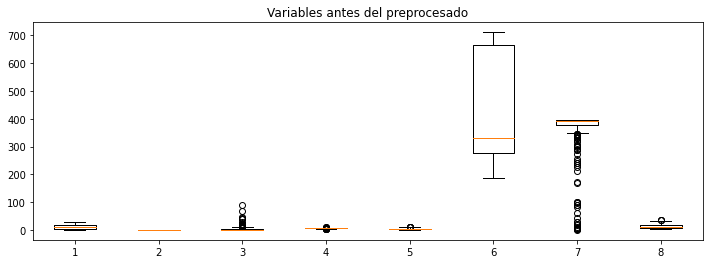

In [45]:
datos_graf = [X_train['INDUS'],X_train['NOX'],X_train['CRIM'],X_train['RM'],X_train['DIS'],X_train['TAX'],X_train['B'],X_train['LSTAT']]
fig = plt.figure(1, figsize=(12, 4))
ax = fig.add_subplot(111)
bp = ax.boxplot(datos_graf)
ax.set_title("Variables antes del preprocesado", fontsize = 12);

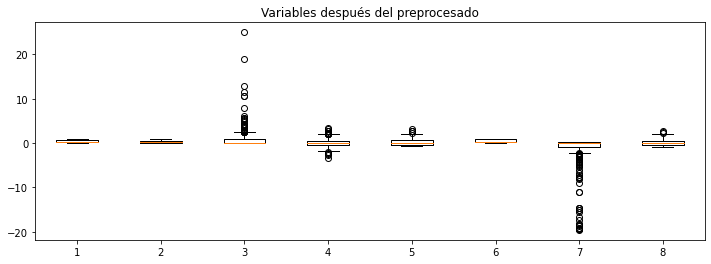

In [46]:
datos_grafFS = [X_trainFS['INDUS'],X_trainFS['NOX'],X_trainFS['CRIM'],X_trainFS['RM'],X_trainFS['DIS'],X_trainFS['TAX'],X_trainFS['B'],X_trainFS['LSTAT']]
fig = plt.figure(1, figsize=(12, 4))
ax = fig.add_subplot(111)
bp = ax.boxplot(datos_grafFS)
ax.set_title("Variables después del preprocesado", fontsize = 12);

Tras el preprocesado las distribuciones están centradas y los outliers preparados para poder trabajar.

Nuestro dataset queda preparado para poder definir un modelo y entrenarlo.

In [47]:
X_trainFS.head()

,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,B,LSTAT,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
81,-0.061153,0.161290,0,0.084362,0.514286,0.695160,0.814535,0.179389,0.209157,-0.394911,0,0,0,1,0,0,0,0,0
360,1.205836,0.646628,0,0.792181,0.227273,0.876416,-0.211375,0.914122,-0.845134,-0.336896,0,0,0,0,0,0,0,0,1
394,3.690029,0.646628,0,0.633745,-0.436364,0.945417,-0.473360,0.914122,0.272705,0.534351,0,0,0,0,0,0,0,0,1
194,-0.069670,0.090543,0,0.032922,0.494805,0.163749,1.105990,0.148855,-0.738054,-0.683969,1,0,0,0,0,0,0,0,0
477,4.158703,0.646628,0,0.471193,-1.193506,0.972194,-0.359967,0.914122,-2.100075,1.405598,0,0,0,0,0,0,0,0,1


In [48]:
X_testFS.head()

,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,B,LSTAT,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
329,-0.054781,0.101906,0,0.154321,0.142857,0.147271,0.748301,0.463740,-0.812609,-0.382697,0,0,0,1,0,0,0,0,0
371,2.527221,0.646628,0,0.506173,-0.009091,1.000000,-0.691533,0.914122,-1.265949,-0.159796,0,0,0,0,0,0,0,0,1
219,-0.041537,0.492302,1,0.339506,0.194805,0.921730,0.089405,0.169847,0.114586,-0.061069,0,0,0,0,1,0,0,0,0
403,6.913468,0.646628,0,0.633745,-1.135065,0.958805,-0.501584,0.914122,0.272705,0.882443,0,0,0,0,0,0,0,0,1
78,-0.057818,0.453446,0,0.106996,0.011688,0.523172,0.676941,0.402672,-0.252690,0.126209,0,0,0,0,1,0,0,0,0
